<a href="https://colab.research.google.com/github/calosos/py_resumenes_codigos/blob/main/C2_Retos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
import json

In [ ]:
df_near_objets = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto near_earth_objects-jan_feb_1995-clean.csv', index_col=0)
df_melbourne= pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto melbourne_housing-clean.csv', index_col=0)  

In [ ]:
df_ny_b_s= pd.read_json('/content/drive/MyDrive/Remoto Datasets/Remoto new_york_times_bestsellers-clean.json')

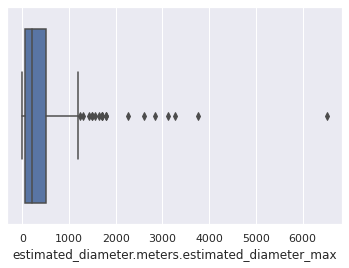

In [ ]:
#near_objets estimated_diameter.meters.estimated_diameter_max
sns.set(style='darkgrid')
sns.boxplot(x= df_near_objets['estimated_diameter.meters.estimated_diameter_max'])

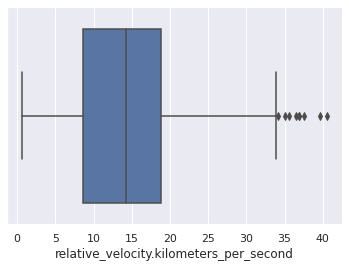

In [ ]:
#near_obje
sns.set(style='darkgrid')
sns.boxplot(x= df_near_objets['relative_velocity.kilometers_per_second'])

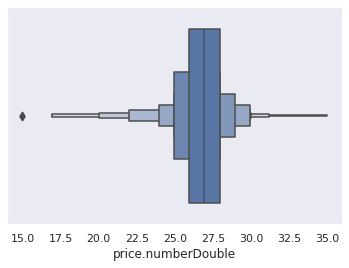

In [ ]:
sns.set(style='dark')
sns.boxenplot(x= df_ny_b_s['price.numberDouble'])

In [ ]:
#1

In [ ]:
#2

In [ ]:
#3

In [ ]:
#4

In [ ]:
df_near_objets.dtypes

id                                                    int64
name                                                 object
is_potentially_hazardous_asteroid                      bool
estimated_diameter.meters.estimated_diameter_min    float64
estimated_diameter.meters.estimated_diameter_max    float64
close_approach_date                                  object
epoch_date_close_approach                             int64
orbiting_body                                        object
relative_velocity.kilometers_per_second             float64
relative_velocity.kilometers_per_hour               float64
dtype: object

In [ ]:
iqr_n_o = df_near_objets['estimated_diameter.meters.estimated_diameter_max'].quantile(0.75) - df_near_objets['estimated_diameter.meters.estimated_diameter_max'].quantile(0.25)
filtro_inferior_n_o = df_near_objets['estimated_diameter.meters.estimated_diameter_max'] > df_near_objets['estimated_diameter.meters.estimated_diameter_max'].quantile(0.25)-(iqr_n_o*1.5)
filtro_superior_n_o= df_near_objets['estimated_diameter.meters.estimated_diameter_max'].quantile(0.75)+(iqr_n_o*1.5)
df_filtrado = df_near_objets[filtro_inferior_n_o & filtro_superior_n_o]

TypeError: ignored

In [ ]:
sns.set(style='darkgrid')
sns.boxplot(x= df_filtrado['estimated_diameter.meters.estimated_diameter_max'])

NameError: ignored

In [ ]:
df_ny_b_s.shape

(3033, 12)

In [ ]:
serie_prices = df_ny_b_s['price.numberDouble']
df_prices_ny_b_s = pd.DataFrame(df_ny_b_s['price.numberDouble']) 
df_prices_ny_b_s.sample(10)

,price.numberDouble
2351,27.99
2731,26.95
907,26.95
2315,27.99
1924,27.99
1180,26.95
549,27.95
456,22.95
817,26.95
2141,26.99


In [ ]:
df_prices_ny_b_s.min()

price.numberDouble    14.99
dtype: float64

In [ ]:
df_prices_ny_b_s.max()

price.numberDouble    34.99
dtype: float64

In [ ]:
serie_prices
serie_prices.max() - serie_prices.min()

20.0

In [ ]:
pd.cut(serie_prices,18)

0        (24.99, 26.101]
1        (23.879, 24.99]
2       (22.768, 23.879]
3        (23.879, 24.99]
4        (23.879, 24.99]
              ...       
3028    (27.212, 28.323]
3029    (27.212, 28.323]
3030    (26.101, 27.212]
3031    (28.323, 29.434]
3032     (24.99, 26.101]
Name: price.numberDouble, Length: 3033, dtype: category
Categories (18, interval[float64, right]): [(14.97, 16.101] < (16.101, 17.212] < (17.212, 18.323] <
                                            (18.323, 19.434] ... (30.546, 31.657] <
                                            (31.657, 32.768] < (32.768, 33.879] < (33.879, 34.99]]

In [ ]:
print(df_ny_b_s['price.numberDouble'].mean())
print(df_ny_b_s['price.numberDouble'].median())

26.8183679525219
26.95


In [ ]:
segmentos= pd.cut(serie_prices,18)
df_ny_b_s['price.numberDouble'].groupby(segmentos).count()

price.numberDouble
(14.97, 16.101]       3
(16.101, 17.212]     11
(17.212, 18.323]      0
(18.323, 19.434]      0
(19.434, 20.546]     33
(20.546, 21.657]      0
(21.657, 22.768]     24
(22.768, 23.879]      9
(23.879, 24.99]     446
(24.99, 26.101]     666
(26.101, 27.212]    591
(27.212, 28.323]    986
(28.323, 29.434]    168
(29.434, 30.546]     84
(30.546, 31.657]      0
(31.657, 32.768]      0
(32.768, 33.879]      0
(33.879, 34.99]      12
Name: price.numberDouble, dtype: int64

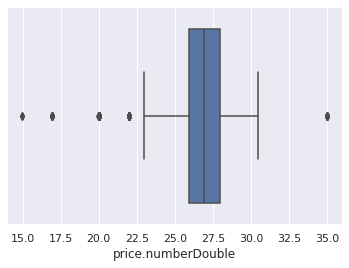

In [ ]:
sns.boxplot(x=df_ny_b_s['price.numberDouble'])

Después, genera las tablas de frecuencias para cada uno de estos conjuntos de datos y compáralos con las gráficas de caja que realizaste en el Reto anterior. ¿Hay información nueva? ¿Qué ventajas o desventajas nos da esta nueva perspectiva?

Piensa cuál de las dos aproximaciones (boxplots y tablas de frecuencia) resulta más útil para detectar valores atípicos. ¿O simplemente son útiles en diferentes contextos?

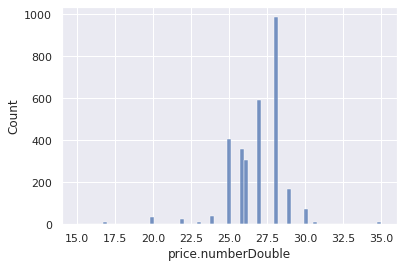

In [ ]:
sns.histplot(df_ny_b_s['price.numberDouble'])

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(df_ny_b_s['price.numberDouble'])
fig